<a href="https://colab.research.google.com/github/aqafridi/DeepLearning/blob/main/Neural_Networks_in_python_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
#only for importing datasets of mnist.
# from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

(70000, 784)
(70000,)
5


Text(0.5, 1.0, '5')

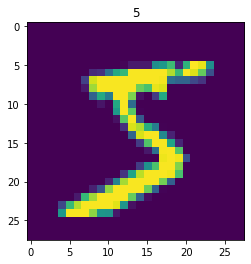

In [68]:
print(X.shape)
print(y.shape)
print(y[0])
img=X[0]
plt.imshow(img.reshape((28,28)))
plt.title(y[0])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=10000, random_state=4)

In [70]:
print('x_train  '+ str(x_train.shape))
print('y_train  '+ str(y_train.shape))
print('x_test  '+ str(x_test.shape))
print('y_test  '+ str(y_test.shape))

x_train  (60000, 784)
y_train  (60000,)
x_test  (10000, 784)
y_test  (10000,)


Text(0.5, 1.0, '1')

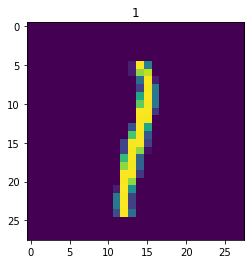

In [71]:
img=x_train[0]
plt.imshow(img.reshape((28,28)))
plt.title(y_train[0])

#Reshape the training and test examples

In [72]:
# Reshape the training and test examples 
train_flat = x_train.reshape(x_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_flat = x_test.reshape(x_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.

In [73]:
x_train = train_flat/255 
x_test = test_flat/255
print ("train_x's shape: " + str(x_train.shape))
print ("test_x's shape: " + str(x_test.shape))

train_x's shape: (784, 60000)
test_x's shape: (784, 10000)


In [ ]:
def softmax(z):
    e_x = np.exp(z)
    A= e_x / np.sum(np.exp(z))  
    cache=z
    return A,cache 